# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [305]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [306]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

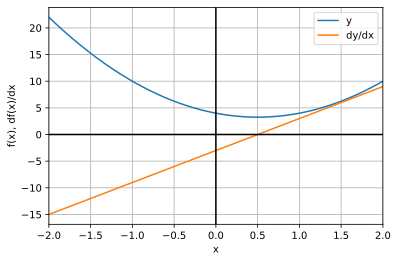

In [307]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001) # number of points: 2001 (-2.000, -1.999, ..., 1.999, 2.000)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x), df(x)/dx')
plt.legend(['y','dy/dx'])

# draw axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

In [308]:
# random starting point
localmin = np.random.choice(x,1)  # returns a list, so take the first element if you want a number
print(localmin)

# learning parameters
learning_rate = .01  # step size
training_epochs = 100  # number of iterations

# run through training - gradient descent
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad # update rule for gradient descent

print(localmin)
print(localmin[0])

[0.628]
[0.50026302]
0.5002630239706268


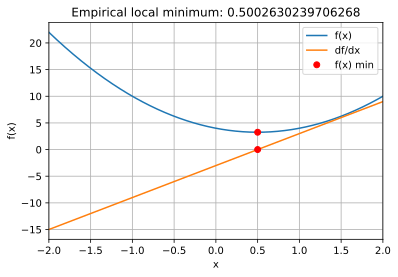

In [309]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df/dx','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [310]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))   # [[0, 0], [0, 0], ...] (float64)

# print(modelparams[0:5,:])

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

print('MODEL PARAMETERS (localmin, grad):\n')  
print(np.round(modelparams[0:5], 5), '\n...')
print(np.round(modelparams[training_epochs-5:training_epochs], 5))


MODEL PARAMETERS (localmin, grad):

[[ -1.2202  -10.98   ]
 [ -1.11699 -10.3212 ]
 [ -1.01997  -9.70193]
 [ -0.92877  -9.11981]
 [ -0.84304  -8.57262]] 
...
[[ 0.49518 -0.03074]
 [ 0.49547 -0.0289 ]
 [ 0.49574 -0.02716]
 [ 0.496   -0.02553]
 [ 0.49624 -0.024  ]]


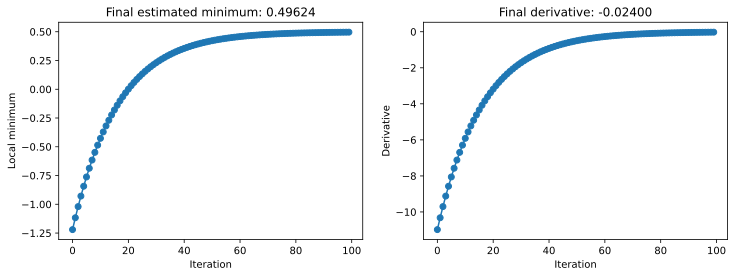

In [311]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  

ax[0].set_ylabel('Local minimum')
ax[0].set_title(f'Final estimated minimum: {localmin[0]:.5f}')
ax[1].set_ylabel('Derivative')
ax[1].set_title(f'Final derivative: {modelparams[-1,1]:.5f}')

plt.show()

# Additional explorations

In [312]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 

# Answers to the explorations

In [313]:
# random starting point
localmin = np.random.choice(x,1)[0]

# learning parameters
learning_rate = .01
# training_epochs = 100
threshold = 0.0001

# run through training and store all the results
modelparams_py = []

# print(modelparams[0:5,:])
grad = deriv(localmin)

while (np.abs(grad) > threshold) and (len(modelparams_py) < 1000):
    localmin = localmin - learning_rate*grad
    modelparams_py.append([localmin, grad])
    grad = deriv(localmin)
  

print('MODEL PARAMETERS (localmin, grad):\n')  
print(np.round(modelparams_py[0:5], 5), '\n...')
print(np.round(modelparams_py[-5:], 5))

print(f'Iterations: {len(modelparams_py)}')

modelparams = np.array(modelparams_py)


MODEL PARAMETERS (localmin, grad):

[[ 0.12964 -2.364  ]
 [ 0.15186 -2.22216]
 [ 0.17275 -2.08883]
 [ 0.19238 -1.9635 ]
 [ 0.21084 -1.84569]] 
...
[[ 4.9998e-01 -1.3000e-04]
 [ 4.9998e-01 -1.3000e-04]
 [ 4.9998e-01 -1.2000e-04]
 [ 4.9998e-01 -1.1000e-04]
 [ 4.9998e-01 -1.0000e-04]]
Iterations: 163


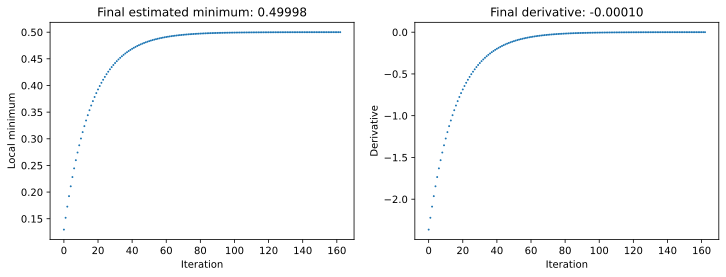

In [314]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'.', markersize=2)
  ax[i].set_xlabel('Iteration')
  

ax[0].set_ylabel('Local minimum')
ax[0].set_title(f'Final estimated minimum: {localmin:.5f}')
ax[1].set_ylabel('Derivative')
ax[1].set_title(f'Final derivative: {modelparams[-1,1]:.5f}')

plt.show()

# Challenge

In [315]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

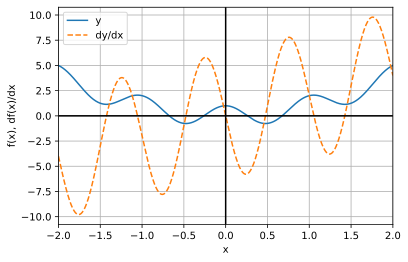

In [316]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001) # number of points: 2001 (-2.000, -1.999, ..., 1.999, 2.000)

# plotting. Second curve as dashed line
plt.plot(x,fx(x), x,deriv(x), '--')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x), df(x)/dx')
plt.legend(['y','dy/dx'])

# draw axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

In [317]:
############################################
# Gradient descent training function
############################################
def train(deriv: callable, learning_rate: float, threshold: float = 0.001, localmin0 = None, grad0 = None, modelparams_py = None):
    # if localmin0 is None, initialize randomly
    if localmin0 is None:
        localmin = np.random.choice(x,1)[0]
    # otherwise, initialize with the provided value
    else:
        localmin = localmin0
        
    # if grad0 is None, initialize it
    if grad0 is None:
        grad = deriv(localmin)
    # otherwise, initialize with the provided value
    else:
        grad = grad0
        
    # if modelparams_py is None, initialize it
    if modelparams_py is None:
        modelparams_py = [[localmin, grad]]
        
    while np.abs(grad) > threshold:
        localmin = localmin - learning_rate*grad
        modelparams_py.append([localmin, grad])
        grad = deriv(localmin)
    
    return localmin, modelparams_py


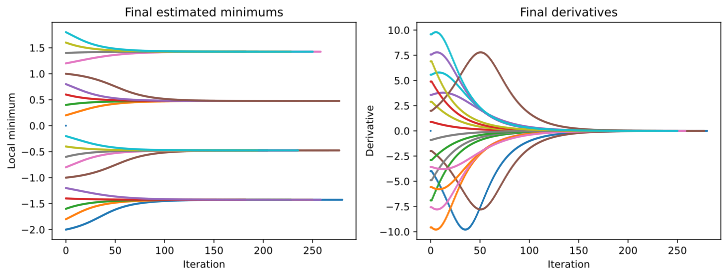

In [322]:
learning_rate = .001
threshold = 0.001

params = []
localmins = []

for i in range(20):
    lm0 = -2 + i*4/20
    localmin, modelparams_py = train(deriv, learning_rate, threshold, localmin0=lm0)
    
    localmins.append(localmin)
    
    modelparams = np.array(modelparams_py)
    params.append(modelparams)

# print(f'Iterations: {len(modelparams_py)}')

# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))


for i in range(2):
    for j in range(0, len(localmins)):
        ax[i].plot(params[j][:,i],'.-', markersize=2)
    
    ax[i].set_xlabel('Iteration')
  

ax[0].set_ylabel('Local minimum')
ax[0].set_title(f'Final estimated minimums')
ax[1].set_ylabel('Derivative')
ax[1].set_title(f'Final derivatives')

plt.show()

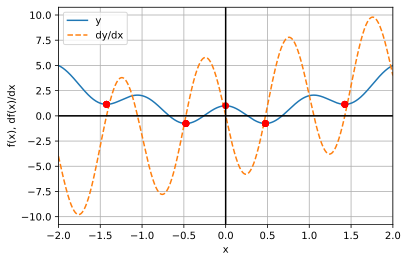

In [324]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001) # number of points: 2001 (-2.000, -1.999, ..., 1.999, 2.000)

# plotting. Second curve as dashed line
plt.plot(x,fx(x), x,deriv(x), '--')

# plot the local minimums
for i in range(len(localmins)):
    lm = localmins[i]
    plt.plot(lm, fx(lm), 'o', color='red')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x), df(x)/dx')
plt.legend(['y','dy/dx'])

# draw axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()